#Análise Exploratória de Dados

Utilizei o seguinte dataset:
https://www.kaggle.com/datasets/thedevastator/unlock-profits-with-e-commerce-sales-data

#Atributos

* Order ID - ID do pedido.
* Date - Data do pedido.
* Status - Status do pedido.
* Fulfilment - Por onde foi feita a compra. (Ex: Comprar na Americanas direto da loja ou por um vendedor terceirizado)
* Sales Channel - Canal por onde foi feita a compra.
* ship-service-level - Tipo de transporte. (Padrão ou expresso)
* Style - Estilo do produto. (Código)
* SKU - Unidade de armazenamento. (Código)
* Category - Categoria do produto.
* Size - Tamanho do produto.
* ASIN - Número de identificação do produto na Amazon.
* Courier Status - Status de entrega do correio.
* Qty - Quantidade do produto.
* currency - Moeda utilizada na compra.
* Amount - Quantidade de vendas.
* ship-city - Cidade de entrega.
* ship-state - Estado da entrega.
* ship-posta-code - Código postal do local de entrega.
* ship-country - País de entrega.
* promotion-ids - ID das promoções.
* B2B - Venda Business to Business. (Vendas de empresa para empresa)
* fulfilled-by - Quem realizou a entrega.
* Unnamed: 22 - ???

#Pré-processamento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dados = pd.read_csv('/content/drive/MyDrive/database/Amazon Sale Report.csv')

<ipython-input-3-1b535b28ed5f>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('/content/drive/MyDrive/database/Amazon Sale Report.csv')


In [4]:
dados.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
dados.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [6]:
dados.shape

(128975, 24)

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [8]:
dados.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


#Preparação das colunas com valores faltantes:

In [9]:
dados.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [10]:
dados = dados.drop('index', axis = 1)

Courier Status apresenta muitos dados faltantes. Pesquisando mais sobre o dataset, os valores de Courier Status estão dessa forma pois os correios nem sempre atualizam o status da compra. Entretanto, a coluna 'Status' apresenta informações mais detalhadas sobre os status dos pedidos.

In [11]:
dados['Courier Status'].value_counts()

Shipped      109487
Unshipped      6681
Cancelled      5935
Name: Courier Status, dtype: int64

In [12]:
dados['Status'].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [13]:
dados = dados.drop('Courier Status', axis = 1)

Currency vai ser sempre INR(Rupia indiana) ou igual a NaN.

In [14]:
dados['currency'].value_counts()

INR    121180
Name: currency, dtype: int64

In [15]:
dados = dados.drop('currency', axis = 1)

O dataset não apresenta nenhuma informação sobre o atributo 'Unnamed: 22' e todos os seus valores são NaN ou False.

In [16]:
dados['Unnamed: 22'].value_counts()

False    79925
Name: Unnamed: 22, dtype: int64

In [17]:
dados = dados.drop('Unnamed: 22', axis = 1)

'Ship country' vai ser sempre India ou NaN.

In [18]:
dados = dados.drop('ship-country', axis = 1)

'fulfilled-by' vai ser sempre Easy ship ou NaN.

In [19]:
dados = dados.drop('fulfilled-by', axis = 1)

In [20]:
dados.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Qty                       0
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
B2B                       0
dtype: int64

'Promotion-ids' só tem informações sobre os ids dos produtos

In [21]:
dados['promotion-ids'].value_counts()

IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [22]:
dados = dados.drop('promotion-ids', axis = 1)

97% dos pedidos com 'Amount' null foram cancelados, então preencherei com 0.

In [23]:
dados[dados['Amount'].isnull()]['Status'].value_counts(normalize = True)

Cancelled                       0.970622
Shipped                         0.026684
Shipped - Delivered to Buyer    0.001026
Shipping                        0.001026
Shipped - Returned to Seller    0.000385
Pending                         0.000257
Name: Status, dtype: float64

In [24]:
dados['Amount'].fillna(0, inplace = True)

As 33 tuplas com valores NaN para ship-city, ship-state e shipe-postal-code podem ser preenchidas com 'Desconhecido'.

In [25]:
dados['ship-city'].fillna('Desconhecido', inplace = True)
dados['ship-state'].fillna('Desconhecido', inplace = True)
dados['ship-postal-code'].fillna('Desconhecido', inplace = True)

In [26]:
dados.isna().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
B2B                   0
dtype: int64

In [27]:
dados.shape

(128975, 17)

#Análise Exploratória

# O que mais influencia nos cancelamentos dos pedidos?

In [28]:
cancelado = dados[dados['Status'] == 'Cancelled']

fulfillement = cancelado.groupby('Fulfilment').count()['SKU']

categoria = cancelado.groupby('Category').count()['SKU']
categoria = categoria.sort_values(ascending = False)[:5]

cidade = cancelado.groupby('ship-city').count()['SKU']
cidade = cidade.sort_values(ascending = False)[:5]

entrega = cancelado.groupby('ship-service-level').count()['SKU']


fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'pie'}, {'type': 'xy'}],
                                           [{'type': 'xy'}, {'type': 'pie'}]],
                    subplot_titles=['Vendas canceladas por local de compra', 'Vendas canceladas por tipo de produto', 'Vendas canceladas por cidade', 'Vendas canceladas por tipo de entrega'])

fig.add_trace(go.Pie(
    labels = fulfillement.index,
    values = fulfillement.values
),
  row = 1, col = 1
)

fig.add_trace(go.Bar(
    x = categoria.index,
    y = categoria.values
),
  row = 1, col = 2
)

fig.add_trace(go.Bar(
    x = cidade.index,
    y = cidade.values
),
  row = 2, col = 1
)

fig.add_trace(go.Pie(
    labels = entrega.index,
    values = entrega.values
),
  row = 2, col = 2
)

fig.update_layout(
    template = 'plotly_dark'
)

# Quais as categorias de produtos mais comprados?

In [35]:
concluido = dados[dados['Status']=='Shipped']
concluido

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,True
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,574.0,CHENNAI,TAMIL NADU,600073.0,False
5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,1,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,False
6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,1,653.0,CHANDIGARH,CHANDIGARH,160036.0,False
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,1,363.0,Chennai,TAMIL NADU,600041.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,1,517.0,HYDERABAD,TELANGANA,500013.0,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,1,999.0,GURUGRAM,HARYANA,122004.0,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,1,690.0,HYDERABAD,TELANGANA,500049.0,False
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,1,1199.0,Halol,Gujarat,389350.0,False


In [36]:
maisvendidos = concluido.groupby('Category').count()['SKU']
maisvendidos = maisvendidos.sort_values(ascending = False)

fig2 = go.Figure()
fig2.add_trace(go.Bar(
    x = maisvendidos.index,
    y = maisvendidos.values,
    marker_color = 'Purple'
))

fig2.update_layout(
    template = 'plotly_dark',
    title = dict(
        text  ='Categorias mais vendidas',
        x = 0.5
    ),
    yaxis_title = 'Quantidade'
)

# Quais estados compram mais?

In [44]:
estado = concluido.groupby('ship-city').count()['SKU']
estado = estado.sort_values(ascending = False)[:10]

fig3 = go.Figure()
fig3.add_trace(go.Bar(
    x = estado.index,
    y = estado.values,
    marker_color = 'Orange'
))

fig3.update_layout(
    template = 'plotly_dark',
    title = dict(
        text  ='Estados que mais compram',
        x = 0.5
    ),
    yaxis_title = 'Quantidade'
)


# Estados que mais compram e as categorias:

In [41]:
fig4 = px.histogram(concluido, x='ship-state', color = 'Category').update_xaxes(categoryorder='total descending')
fig4.update_layout(template='plotly_dark', yaxis_title = 'Quantidade')
fig4.show()

#Vendas ao longo do tempo

<ipython-input-43-91628e27a790>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



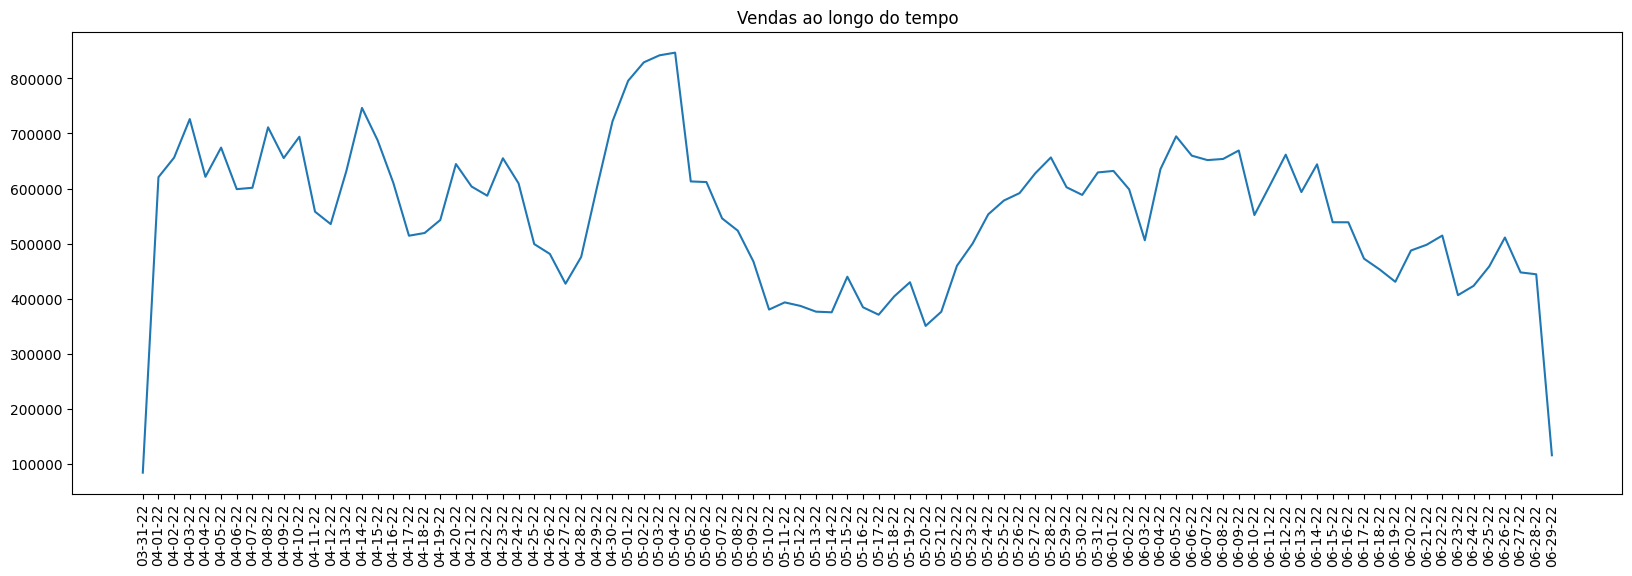

In [43]:
vendas_tempo = concluido.groupby('Date').sum()['Amount']
fig5 = plt.figure(figsize=(20, 6))
plt.plot(vendas_tempo.index, vendas_tempo.values)
plt.title('Vendas ao longo do tempo')
plt.xticks(rotation=90)
plt.show()

In [47]:
vendas_tempo.sort_values(ascending = False)[:5]

Date
05-04-22    846792.0
05-03-22    841931.0
05-02-22    829175.0
05-01-22    795720.0
04-14-22    746438.0
Name: Amount, dtype: float64

# Conclusões


*   As vendas mais canceladas foram as realizadas diretamente pela Amazon.
*   Bengaluru foi a cidade que mais cancelou e também a que mais comprou.
*   Set e Kurta foram os produtos mais cancelados e também os mais comprados.
*   Produtos com entrega expressa foram mais cancelados.
*   Maharashtra foi o estado que mais comprou e os produtos mais comprados lá foram Set e kurta.
*   05-04-22 foi o dia com o maior número de vendas.